In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
data = [[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]]

In [ ]:
data = np.array(data)
data

array([[ 2, 10],
       [ 2,  5],
       [ 8,  4],
       [ 5,  8],
       [ 7,  5],
       [ 6,  4],
       [ 1,  2],
       [ 4,  9]])

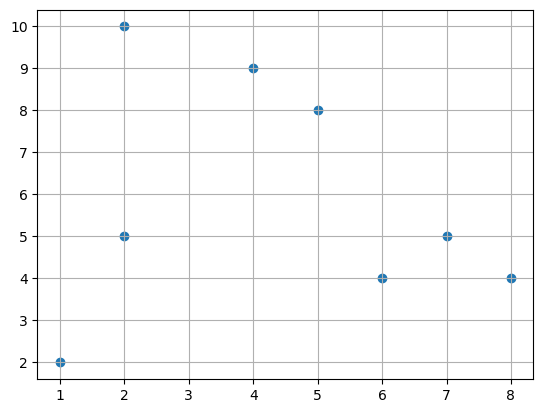

In [4]:
plt.scatter(data[:, 0], data[:, 1])
plt.grid()
plt.show()

In [5]:
data.shape[0]

8

In [6]:
k = 3

In [7]:
# Randomly determine 3 indices
random_indices = np.random.choice(data.shape[0], k, replace=False)
print(random_indices)

[6 5 7]


In [8]:
# Get those the points at those 3 indices
centers = data[random_indices]
# Print the selected points
print("Selected random points (initial centroids):")
print(centers)

Selected random points (initial centroids):
[[1 2]
 [6 4]
 [4 9]]


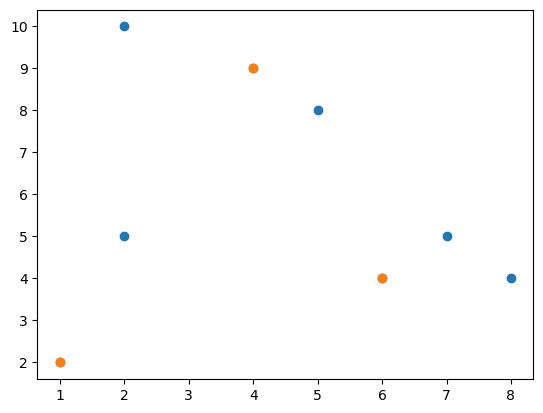

In [10]:
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

In [11]:
def calculate_distance(a, b):
    dist = 0
    for x, y in zip(a, b):
        dist += (x - y) ** 2
    return dist**0.5

In [42]:
distance = np.zeros((data.shape[0], k))

In [43]:
distance

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [44]:
for i, d in enumerate(data):
    for j, c in enumerate(centers):
        distance[i, j] = calculate_distance(d, c)

axis=0: Sorts each column.
axis=1: Sorts each row.

In [45]:
closure = np.argmin(distance, axis=1)   #to find the index of the minimum value in each row

In [46]:
distance

array([[8.06225775, 7.21110255, 2.23606798],
       [3.16227766, 4.12310563, 4.47213595],
       [7.28010989, 2.        , 6.40312424],
       [7.21110255, 4.12310563, 1.41421356],
       [6.70820393, 1.41421356, 5.        ],
       [5.38516481, 0.        , 5.38516481],
       [0.        , 5.38516481, 7.61577311],
       [7.61577311, 5.38516481, 0.        ]])

In [47]:
closure

array([2, 0, 1, 2, 1, 1, 0, 2], dtype=int64)

In [60]:
new_centers = np.zeros((3, 2))
for i, c in enumerate(centers):
    y = closure == i
    s = data[closure == i, :]
    new_centers[i, :] = np.sum(s, axis=0) / s.shape[0]
    print(f'centroid:{i+1} closure:{y} data:{s}')

centroid:1 closure:[False  True False False False False  True False] data:[[2 5]
 [1 2]]
centroid:2 closure:[False False  True False  True  True False False] data:[[8 4]
 [7 5]
 [6 4]]
centroid:3 closure:[ True False False  True False False False  True] data:[[ 2 10]
 [ 5  8]
 [ 4  9]]


In [61]:
new_centers

array([[1.5       , 3.5       ],
       [7.        , 4.33333333],
       [3.66666667, 9.        ]])

In [54]:
distance = np.zeros((data.shape[0], k))
closure = np.zeros((data.shape[0]))
m = 0
while True:
    m = m + 1
    print(f"-------------it:{m}---------")
    for i, d in enumerate(data):
        for j, c in enumerate(centers):
            distance[i, j] = calculate_distance(d, c)
    new_closure = np.argmin(distance, axis=1)
    new_centers = np.zeros((3, 2))
    for i, c in enumerate(centers):
        y = new_closure == i
        s = data[new_closure == i, :]
        new_centers[i, :] = np.sum(s, axis=0) / s.shape[0]
        print(f"centroid:{i+1} closure:{y} data:{s}")
    centers = new_centers.copy()

    print(f"closure:{new_closure} | old_closure:{closure} | centers:{new_centers}")
    if np.all(new_closure == closure):
        break
    closure = new_closure.copy()

-------------it:1---------
centroid:1 closure:[False  True False False False False  True False] data:[[2 5]
 [1 2]]
centroid:2 closure:[False False  True False  True  True False False] data:[[8 4]
 [7 5]
 [6 4]]
centroid:3 closure:[ True False False  True False False False  True] data:[[ 2 10]
 [ 5  8]
 [ 4  9]]
closure:[2 0 1 2 1 1 0 2] | old_closure:[0. 0. 0. 0. 0. 0. 0. 0.] | centers:[[1.5        3.5       ]
 [7.         4.33333333]
 [3.66666667 9.        ]]
-------------it:2---------
centroid:1 closure:[False  True False False False False  True False] data:[[2 5]
 [1 2]]
centroid:2 closure:[False False  True False  True  True False False] data:[[8 4]
 [7 5]
 [6 4]]
centroid:3 closure:[ True False False  True False False False  True] data:[[ 2 10]
 [ 5  8]
 [ 4  9]]
closure:[2 0 1 2 1 1 0 2] | old_closure:[2 0 1 2 1 1 0 2] | centers:[[1.5        3.5       ]
 [7.         4.33333333]
 [3.66666667 9.        ]]


In [18]:
path = "data.csv"

# Read the Excel file into a Pandas DataFrame
df = pd.read_csv(path)
df.head()

,2.098745172099389933e-01,2.002906846795961204e+00
0,1.925265,1.782311
1,0.885361,0.141400
2,1.606608,1.885941
3,1.511095,1.234464
4,2.248156,0.440106


In [19]:
data = df.to_numpy()

In [20]:
data.shape

(1199, 2)

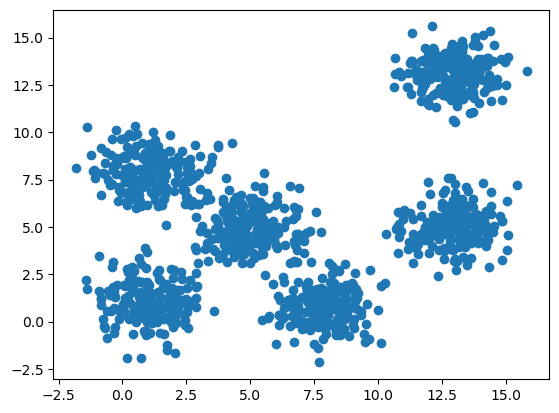

In [21]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [ ]:
k = 3
# Randomly determine 3 indices
random_indices = np.random.choice(data.shape[0], 3, replace=False)
print(random_indices)

[13  6  9]


In [ ]:
centers = data[random_indices]

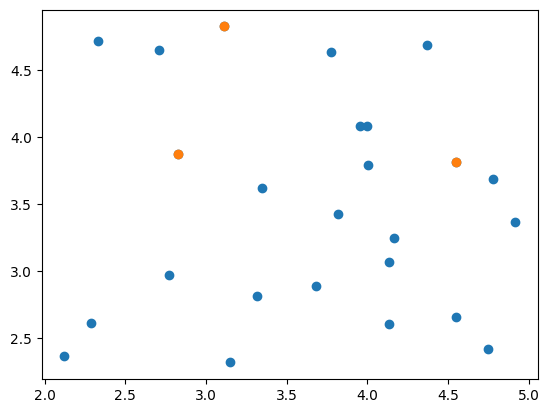

In [ ]:
plt.scatter(data[:, 4], data[:, 5])
plt.scatter(centers[:, 4], centers[:, 5])
plt.show()

In [ ]:
distance = np.zeros((data.shape[0], k))
closure = np.zeros((data.shape[0]))
m = 0
while True:
    m = m + 1
    print(f"-------------it:{m}---------")
    for i, d in enumerate(data):
        for j, c in enumerate(centers):
            distance[i, j] = calculate_distance(d, c)
    new_closure = np.argmin(distance, axis=1)
    new_centers = np.zeros((k, data.shape[1]))
    for i, c in enumerate(centers):
        y = new_closure == i
        s = data[new_closure == i, :]
        new_centers[i, :] = np.sum(s, axis=0) / s.shape[0]
        print(f"centroid:{i+1} closure:{y} data:{s}")
    centers = new_centers.copy()

    print(f"closure:{new_closure} | old_closure:{closure} | centers:{new_centers}")
    if np.all(new_closure == closure):
        break
    closure = new_closure.copy()

-------------it:1---------
centroid:1 closure:[False False  True  True  True False False False  True False  True False
  True  True  True False  True False  True  True False False False False
  True] data:[[ 8.          4.         85.          1.          3.81787992  3.42611067]
 [ 5.          6.         99.          6.          4.77890264  3.68982672]
 [ 7.          8.         89.          4.          3.95323108  4.08654826]
 [ 5.          5.         91.          3.          2.28623035  2.60918367]
 [ 8.          4.         78.          4.          4.00652376  3.7965964 ]
 [ 3.          9.         75.          4.          3.77389336  4.64140352]
 [ 6.          5.         93.          6.          2.82416538  3.87306214]
 [ 5.          5.         83.          4.          3.68373028  2.88690106]
 [ 8.          5.         85.          0.          4.91513629  3.36960371]
 [ 2.          5.         80.          0.          4.16518856  3.24952984]
 [ 5.          7.         97.          0.    

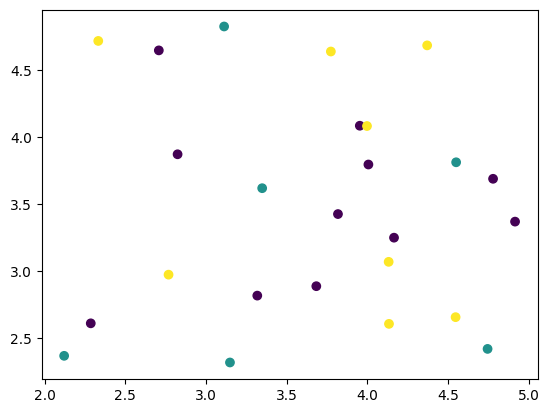

In [ ]:
plt.scatter(data[:, 4], data[:, 5], c=closure)